# **Homework 3**

In this Homework, people who collaborated on all excercises are:


*   Danilo Guglielmi (s318083)
*   Maria Francesca Merangolo (s318905)
*   Gabriele Martina (s310789)

**Problem 1**: Influenza H1N1 2009 Pandemic in Sweden

In this problem, we simulate the progression of a pandemic under various realistic scenarios, using the 2009 pandemic of a virus called H1N1 as a reference point.

The objective is to understand and simulate how, under different initial conditions, the virus can spread within a population. For algorithmic efficiency, the population is treated as nodes in a graph, where relationships
between individuals are represented by graph edges and constitute the sole mode of virus transmission.

If a person comes into contact with an infected individual, there is a certain probability of being infected in turn.

To begin, we need to define the terminology. During a pandemic, we analyze three potential states for individuals:

$S$ (Susceptible): Those who have never had the disease but can be infected by their neighboring individuals of type $I$.

$I$ (Infected): Those who are "sick" and can transmit the disease and/or infect others.

$R$ (Recovered): Those who have been infected but have recovered and can neither be infected again nor infect others.

**1.1.1** Epidemic on a known graph

First and foremost, let's simulate the pandemic on a known undirected graph, specifically a $k$-complete graph with $|V| = 500$ nodes (with $k = 4$). This implies that all nodes (individuals) have interactions with exactly $k$ different people.


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand
import random
import scipy as sp

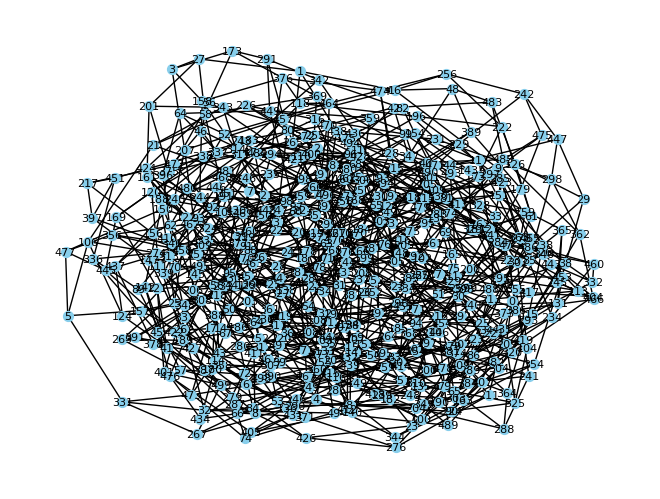

In [2]:
# Graph parameters
V = 500 # number of nodes
k = 4

# Generate a k-regular graph
G = nx.random_regular_graph(k, V)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=8)
plt.show()

In [3]:
b = 0.3 # probability that the infection is spread
p = 0.7 # probability that an infected will recover

#1 week = time units
weeks = 15
N = 100

The function `plot_fnc` is responsible for simulating a pandemic and plotting the required trends, which include:
- the number of newly infected each week (averaged over $N$=$100$ simulations)
- the average number of total infected, total susceptibles, and total recovered each week.

The function takes five parameters:
- $G$: The graph on which to simulate the pandemic.
- $weeks$: The number of weeks for the simulation.
- $b$ and $p$: The values of $\beta$ e $\rho$ for the simulation.
- $N$: The number of simulations to perform.

Our simulation starts with only $10$ random infected nodes.

The disease propagation model that you will use to simulate the epidemic is a discrete-time simplified version of the SIR epidemic model.

At any time $t = 0,1,...$ nodes are in state $X_i(t)$ $\in$ \{ $S, I, R$ \}. Let $\beta$ $\in$ [$0$; $1$] be the probability that the infection is spread from an infected individual to a susceptible one (given that they are connected by a link) during one time step.

Assuming that a susceptible node $i$ has $m$ infected neighbors, this means that the probability that individual $i$ does not get infected by any of the neighbors during one time step is $(1-\beta)^m$. Thus, the probability
that individual $i$ becomes infected by any of its neighbors is $1 - (1 - \beta)^m$.

Furthermore, let $\rho \in [0; 1]$ be the probability that an infected individual will recover during one time step.

Infected: [287 287 495  49 149 377  44  42 403 471] 



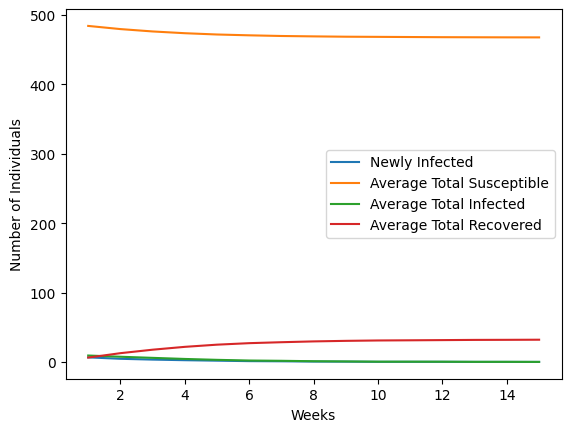

In [4]:
def plot_fnc(N,weeks,b,p,G):

  # Initialize arrays to store simulation results
  newly_infected_per_week = np.zeros((N,weeks))
  total_susceptible_per_week = np.zeros((N, weeks))
  total_infected_per_week = np.zeros((N, weeks))
  total_recovered_per_week = np.zeros((N, weeks))

  # Random infected nodes
  infected = np.random.randint(0, V, 10)
  print("Infected:" , infected, "\n")

  # Run N simulations
  for n in range(N):
      # Initialize node states (S: 0, I: 1, R: 2)
      node_states = np.zeros(V)
      # In the initial configuration, agents in vector 'infected' are infected
      node_states[infected] = 1

      for week in range(weeks):
          # Arrays to store states for the current week
          newly_infected = np.zeros(V)
          newly_recovered = np.zeros(V)

          # Update states for each node
          for node in G.nodes():
            #number of infected neighbors nodes
              m = 0
              if node_states[node] == 1:  # Infected
                  # Check recovery
                  if np.random.rand() <= p:
                      newly_recovered[node] = 1
                      node_states[node] = 2
              elif node_states[node] == 0: # Susceptible
                  # Spread infection to neighbors
                  neighbors = list(G.neighbors(node))
                  for x in neighbors:
                    if node_states[x] == 1:
                      m += 1
                  if np.random.rand() <= (1 - (1 - b)**m):
                    newly_infected[node] = 1

          # Update node states based on the current week's results
          node_states += newly_infected

          # Store simulation results for the current week
          newly_infected_per_week[n, week] = np.sum(newly_infected)
          total_susceptible_per_week[n, week] = np.sum(node_states == 0)
          total_infected_per_week[n, week] = np.sum(node_states == 1)
          total_recovered_per_week[n, week] = np.sum(node_states == 2)

  # Calculate averages over N simulations
  avg_newly_infected = np.mean(newly_infected_per_week, axis=0)
  avg_total_susceptible = np.mean(total_susceptible_per_week, axis=0)
  avg_total_infected = np.mean(total_infected_per_week, axis=0)
  avg_total_recovered = np.mean(total_recovered_per_week, axis=0)

  # Plot the results
  weeks_range = np.arange(1, weeks + 1)
  plt.plot(weeks_range, avg_newly_infected, label='Newly Infected')
  plt.plot(weeks_range, avg_total_susceptible, label='Average Total Susceptible')
  plt.plot(weeks_range, avg_total_infected, label='Average Total Infected')
  plt.plot(weeks_range, avg_total_recovered, label='Average Total Recovered')

  plt.xlabel('Weeks')
  plt.ylabel('Number of Individuals')
  plt.legend()
  plt.show()


plot_fnc(N,weeks,b,p,G)

From the obtained plot, we can observe that, after the initial weeks with a slight increase in infected individuals and a subsequent decrease in susceptible nodes, the virus spread slows down.

According to our analysis, this behavior may be attributed to the graph structure and the initial number of infected nodes: there are too few infected nodes for $500$ total nodes, and with $k = 4$, there is a slowed propagation of the epidemic. As weeks pass, the number of $R$ nodes (i.e., nodes that cannot be infected or infect others) increases, further slowing down the virus spread.

**1.1.2** Generate a random graph

In this exercise, we develop the function `preferential_attachment_random_graph`. This function uses the `preferential attachment model` to generate an undirected random graph $G$ with a large number of nodes an average degree $k$ $\in$ $Z^+$ starting from an initial graph $G1$ with $|V| = k + 1$ nodes.

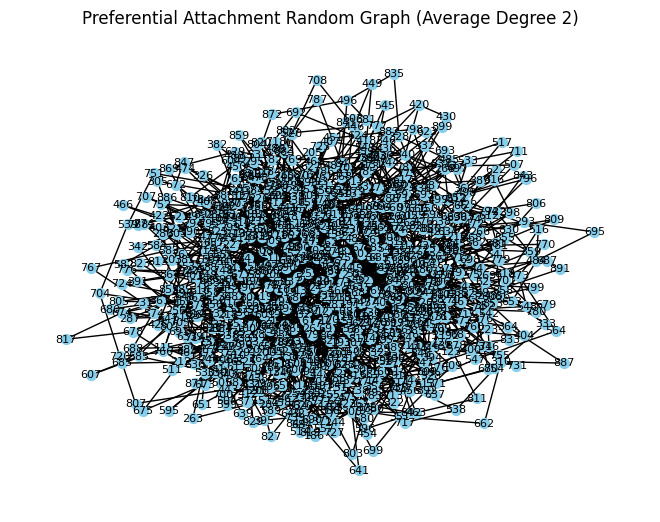

In [5]:
def preferential_attachment_random_graph(num_nodes, avg_degree):
    # Step 1: Create initial complete graph G1 with k+1 initial nodes
    G_random = nx.complete_graph(avg_degree+1)

    # Step 2: Preferential Attachment
    for i in range(avg_degree+1, num_nodes):
        # Calculate the probability of attachment for each existing node
        probabilities = [G_random.degree(j) for j in G_random.nodes()]
        probabilities = probabilities / np.sum(probabilities)
        # Choose nodes to connect to the new node based on preferential attachment
        targets = np.random.choice(G_random.nodes(), size=avg_degree, replace=False, p=probabilities)

        # Add the new node and edges to the selected targets
        G_random.add_node(i)
        G_random.add_edges_from([(i, target) for target in targets])

    return G_random

# Parameters
num_nodes_total = 900
average_degree = 2

# Generate the random graph using preferential attachment
random_graph = preferential_attachment_random_graph(num_nodes_total, average_degree)

# Draw the graph
pos = nx.spring_layout(random_graph)
nx.draw(random_graph, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=8)
plt.title(f"Preferential Attachment Random Graph (Average Degree {average_degree})")
plt.show()

**1.2**: Simulate a pandemic without vaccination

Now we use the two functions created in the previous points to study the simulation of the pandemic in the case of a random graph.

First of all, we create the random graph `random_graph` with $|V| = 500$ and $k = 6$. After this, we begin the simulation with values of $\beta$ and $\rho$ identical to those used in $ex.$ $1.1$, in order to compare the two cases and discuss our findings.

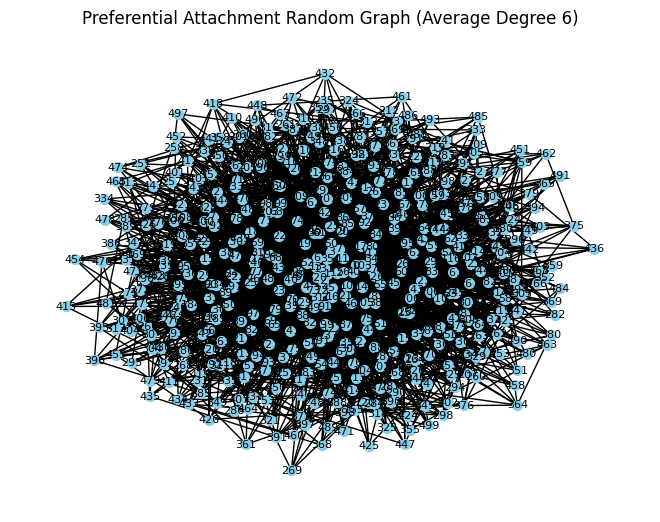

Infected: [426 276 126  99 271 320 161 194  48 330] 



In [6]:
# Parameters
n_agents = 500 # V
average_degree = 6 # k

# Generate the random graph using preferential attachment
random_graph = preferential_attachment_random_graph(n_agents, average_degree)

# Draw the graph
pos = nx.spring_layout(random_graph)
nx.draw(random_graph, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=8)
plt.title(f"Preferential Attachment Random Graph (Average Degree {average_degree})")
plt.show()

infected = np.random.randint(0, n_agents, 10)
print("Infected:" , infected, "\n")

Infected: [212 398 465 356 266 414  26 150 231 347] 



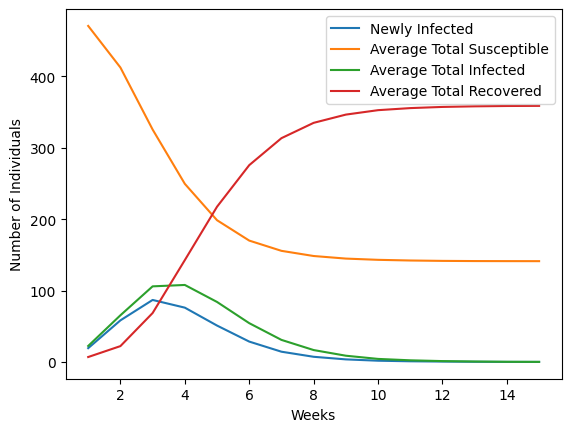

In [7]:
plot_fnc(N,weeks,b,p,random_graph)

In contrast to the previous plot ($ex.$ $1.1$), in this latest one, we observe how a higher value of $k$ ($6$), with the same number of nodes ($500$), leads to a much faster initial spread of the virus.

This happens because the number of people in contact with each other increases, and consequently, the likelihood of being infected or infecting others also rises.

As weeks pass, the rate of recovery also increases, and the number of nodes in the Recovered state ($R$) becomes significantly higher.

**1.3**: Simulate a pandemic with vaccination

This exercise is a variation of $ex. 1.2$. After generating the random graph using `preferential_attachment_random_graph` function, we analyze the simulation considering the possibility of vaccinating a portion of the population each week.

Vaccinated individuals constitute a new state, denoted as $V$, which is added to the $I$, $R$, and $S$ states. They behave similarly to individuals in the Recovered state $R$ and thus cannot be infected or spread the virus. Additionally, anyone can transition their state to $V$.
- If an infected $I$ individual is vaccinated, they immediately recover.
- A susceptible $S$ individual who is vaccinated does not need to go through the $I$ state to become immune to the virus.


For our simulation, it is known that only a percentage of the population is vaccinated each week, reaching up to $60\%$ of the total vaccinated individuals at the end of the $15$ weeks, regardless of their initial state during the vaccination week.

This information is represented as a vector:

$Vacc(t) =$ $[0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]$

where the element $Vacc(i)$ represents the total vaccinated individuals in the population at the end of week $i$.

Vaccination: [  0.  25.  75. 125. 175. 225. 275. 300. 300. 300. 300. 300. 300. 300.
 300. 300.] 

Infected:  [379 286  33  94  77 265 255 410  97  28] 



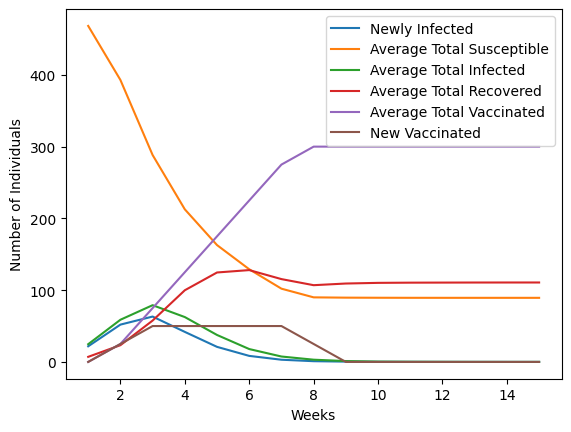

In [8]:
vaccination = np.array([0,5,15,25,35,45,55,60,60,60,60,60,60,60,60,60])
print("Vaccination:",500*vaccination/100, "\n")

G1 = random_graph.copy()

# Initialize arrays to store simulation results
newly_infected_per_week = np.zeros((N,weeks))
total_susceptible_per_week = np.zeros((N, weeks))
total_infected_per_week = np.zeros((N, weeks))
total_recovered_per_week = np.zeros((N, weeks))
total_vaccination_per_week = np.zeros((N,weeks))
new_vaccination_per_week = np.zeros((weeks))

#Random infected nodes
infected = np.random.randint(0, n_agents, 10)
print("Infected: ", infected, "\n")

# Run N simulations
for n in range(N):
    # Initialize node states (S: 0, I: 1, R: 2, V: 3)
    node_states = np.zeros(n_agents)
    # In the initial configuration, agents in vector 'infected' are infected
    node_states[infected] = 1

    for week in range(weeks):
        # Arrays to store states for the current week
        newly_infected = np.zeros(n_agents)
        newly_recovered = np.zeros(n_agents)
        if week > 0:
          #Calculate the remaining number of people left to be vaccinated to reach Vacc(weeks)
          vacc = int(((vaccination[week]-vaccination[week-1]) / 100) * n_agents)
          pos_vacc = np.random.choice(np.where(node_states[:] != 3)[0], vacc, replace=False)
          # Change the state of vaccinated people
          node_states[pos_vacc] = 3
          new_vaccination_per_week[week] = vacc

        # Update states for each node
        for node in G1.nodes():
            m = 0
            if node_states[node] == 1:  # Infected
                # Check recovery
                if np.random.rand() <= p:
                    newly_recovered[node] = 1
                    node_states[node] = 2
            elif node_states[node] == 0: # Susceptible
                # Spread infection to neighbors
                neighbors = list(G1.neighbors(node))
                for x in neighbors:
                  if node_states[x] == 1:
                    m += 1
                if np.random.rand() <= (1 - (1 - b)**m):
                  newly_infected[node] = 1

        # Update node states based on the current week's results
        node_states += newly_infected

        # Store simulation results for the current week
        newly_infected_per_week[n, week] = np.sum(newly_infected)
        total_susceptible_per_week[n, week] = np.sum(node_states == 0)
        total_infected_per_week[n, week] = np.sum(node_states == 1)
        total_recovered_per_week[n, week] = np.sum(node_states == 2)
        total_vaccination_per_week[n, week] = np.sum(node_states == 3)

# Calculate averages over N simulations
avg_newly_infected = np.mean(newly_infected_per_week, axis=0)
avg_total_susceptible = np.mean(total_susceptible_per_week, axis=0)
avg_total_infected = np.mean(total_infected_per_week, axis=0)
avg_total_recovered = np.mean(total_recovered_per_week, axis=0)
avg_total_vaccinated = np.mean(total_vaccination_per_week, axis=0)

# Plot the results
weeks_range = np.arange(1, weeks + 1)
plt.plot(weeks_range, avg_newly_infected, label='Newly Infected')
plt.plot(weeks_range, avg_total_susceptible, label='Average Total Susceptible')
plt.plot(weeks_range, avg_total_infected, label='Average Total Infected')
plt.plot(weeks_range, avg_total_recovered, label='Average Total Recovered')
plt.plot(weeks_range, avg_total_vaccinated, label='Average Total Vaccinated')
plt.plot(weeks_range, new_vaccination_per_week, label='New Vaccinated')

plt.xlabel('Weeks')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()


**1.4**: The H1N1 pandemic in Sweden 2009

In this section, we examine how the epidemic evolves with the introduction of the vaccine. Consequently, each week, a portion of the population undergoes vaccination. Once an individual is vaccinated, they become immune to infection. The vaccination coverage for each week is represented by the following vector:
$\text{Vacc}(t)=[5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60]$

These vaccinated are randomly selected from the population that has not yet received the vaccine. It is assumed that, regardless of an individual's prior health status, vaccination grants immunity, preventing them from both contracting and transmitting the infection.

In order to not spend too much time running simulations, the population of Sweden is scaled down to $n=V=934$ nodes. The number of newly infected individuals each week during the $15$-week period from week $42$, $2009$, to week $5$, $2010$, is depicted in the following vector:
$I_0(t)=[1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0]$

To estimate the parameters that best match the real pandemic, we define an algorithm which performs a **gradient-based search** over the parameter space of $k$, $\beta$ and $\rho$.
The distance between our simulation and the real pandemic is measured through the root-mean-square error (RMSE) between the number of infected individuals each week $I(t)$ of the simulation and the number of infected individuals each week $I_0(t)$ of the real pandemic:
$\text{RMSE} = \sqrt{\frac{1}{n_\text{weeks}} \sum_{t=1}^{n_\text{weeks}} \left(I(t)-I_0(t)\right)^2 }\qquad$ with $n_{weeks}=15$.

**Algorithm:** We start with an initial guess of the parameters, $k_0$, $\beta_0$, $\rho_0$, along with some $Δk, Δ\beta, Δ\rho$.

1.   For each set of parameters ($k,\beta, \rho$) in the parameter-space:
$k∈ \{k_0-\Delta k, k_0, k_0+\Delta k\}, \quad \beta ∈ \{\beta_0-\Delta \beta, \beta_0, \beta_0+\Delta \beta\}, \quad \rho ∈ \{\rho_0-\Delta \rho, \rho_0, \rho_0+\Delta \rho\}$

  **a)**   Generate a random graph $G = (V, \varepsilon)$ using the preferential attachment model (developed in $1.1.2$) with average degree $k$ and $V=934$ nodes.

  **b)**   Simulate the pandemic $N=10$ times and compute the average number of newly infected individuals each week, $I(t)$.
  
  **c)**   Compute the RMSE between the simulation and the real pandemic.

2.   Update $k_0$, $\beta_0$  and $\rho_0$ to the set of parameters yielding the lowest RMSE. If the result was the same set of parameters, the algorithm stops.

For the simulation we start with the following parameters:

* $k_o = 10$
* $\beta_o = 0.3$
* $\rho_o = 0.6$

We use a relatively small value for $k$ because a larger value would only increase the likelihood of infection, and the simulation would frequently deviate from reality.
If we set $\beta$ or $\rho$ to values greater than these thresholds, we would obtain simulation results exceeding $1$, which is not appropriate. Therefore, we always constrain them within the range of $0.1$ (allowing for a minimal but present possibility of recovery/infection) and $0.9$. We do not consider the case where $\beta = 1$ or $\rho = 1$, as it would imply that infection always spreads or the individual always recovers scenarios that are not very realistic.

In [9]:
# Parameters
n_agents = 934
k = 10
b = 0.3
p = 0.6

N = 10
weeks = 15

vaccination = np.array([5,9,16,24,32,40,47,54,59,60,60,60,60,60,60])
I0 = np.array([1,1,3,5,9,17,32,32,17,5,2,1,0,0,0])


In [10]:
import warnings

# To ignore the warning about the seed
warnings.filterwarnings("ignore", category=DeprecationWarning)

Starting from predetermined values of $\beta$, $\rho$, and $k$, we iteratively utilized the algorithms developed in the previous exercises to find the optimal set of initial parameters to achieve the lowest $RMSE$ error. Specifically, we employed the `preferential_attachment_random_graph` function to generate a random graph for each modification of $k$. Subsequently, we revisited the code from $ex. 1.3$ to obtain, for each parameter set, the necessary values for error calculation by simulating the virus spread on $V=934$ nodes (population).

In [11]:
def function (Graph,vaccination,V,I0,k,b,p,N,weeks,is_best):

  # Initialize arrays to store simulation results
  newly_infected_per_week = np.zeros((N,weeks))
  total_susceptible_per_week = np.zeros((N, weeks))
  total_infected_per_week = np.zeros((N, weeks))
  total_recovered_per_week = np.zeros((N, weeks))
  total_vaccination_per_week = np.zeros((N,weeks))
  new_vaccination_per_week = np.zeros((weeks))

  np.random.seed(k)
  random.seed(k)

  infected = np.random.randint(0, V, 1)
  # Run N simulations
  for n in range(N):
      # Initialize node states (S: 0, I: 1, R: 2, V: 3)
      node_states = np.zeros(V)
      # In the initial configuration, agents in vector 'infected' are infected
      node_states[infected] = 1

      for week in range(weeks):
          # Arrays to store states for the current week
          newly_infected = np.zeros(V)
          newly_recovered = np.zeros(V)
          if week > 0:
            vacc = int(((vaccination[week]-vaccination[week-1]) / 100) * n_agents)  # Calcola la percentuale rispetto alla lunghezza del vettore
            pos_vacc = np.random.choice(np.where(node_states[:] != 3)[0], vacc, replace=False)
            node_states[pos_vacc] = 3
            new_vaccination_per_week[week] = vacc

          # Update states for each node
          for node in Graph.nodes():
              m = 0
              if node_states[node] == 1:  # Infected
                  # Check recovery
                  if np.random.rand() <= p:
                      newly_recovered[node] = 1
                      node_states[node] = 2
              elif node_states[node] == 0: # Susceptible
                  # Spread infection to neighbors
                  neighbors = list(Graph.neighbors(node))
                  for x in neighbors:
                    if node_states[x] == 1:
                      m += 1
                  if np.random.rand() <= (1 - (1 - b)**m):
                    newly_infected[node] = 1

          # Update node states based on the current week's results
          #node_states = (node_states + newly_recovered) % 3
          node_states += newly_infected

          # Store simulation results for the current week
          newly_infected_per_week[n, week] = np.sum(newly_infected)
          total_susceptible_per_week[n, week] = np.sum(node_states == 0)
          total_infected_per_week[n, week] = np.sum(node_states == 1)
          total_recovered_per_week[n, week] = np.sum(node_states == 2)
          total_vaccination_per_week[n, week] = np.sum(node_states == 3)

  # Calculate averages over N simulations
  avg_newly_infected = np.mean(newly_infected_per_week, axis=0) # I(t)

  avg_total_susceptible = np.mean(total_susceptible_per_week, axis=0)
  avg_total_infected = np.mean(total_infected_per_week, axis=0)
  avg_total_recovered = np.mean(total_recovered_per_week, axis=0)
  avg_total_vaccinated = np.mean(total_vaccination_per_week, axis=0)

  RMSE = np.sqrt( np.mean((avg_newly_infected - I0) ** 2) )

  if is_best == 1:
    print("\nBest set of parameters:\nbeta:",b,"\trho:",p,"\tk:",k, "\n")

    # Plot the results
    weeks_range = np.arange(1, weeks + 1)
    plt.figure(figsize=(8, 4))
    plt.plot(weeks_range, avg_newly_infected, label='Simulated Newly Infected')
    plt.plot(weeks_range, I0, label='True values od newly infected')
    plt.xlabel('Weeks')
    plt.ylabel('Number of Individuals')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(weeks_range, avg_total_susceptible, label='Average Total Susceptible')
    plt.plot(weeks_range, avg_total_infected, label='Average Total Infected')
    plt.plot(weeks_range, avg_total_recovered, label='Average Total Recovered')
    plt.plot(weeks_range, avg_total_vaccinated, label='Average Total Vaccinated')
    plt.plot(weeks_range, new_vaccination_per_week, label='New Vaccinated')
    plt.xlabel('Weeks')
    plt.ylabel('Number of Individuals')
    plt.legend()
    plt.show()

  return RMSE


To minimize the error, we explored the entire neighborhood of $\beta$, $k$, and $\rho$, adjusting them each time with an increasing $Δρ$, $Δk$, $Δ\beta$.


In both the case, $Δρ$ and $Δ\beta$ (starting from 0) increases by $0.1$ each time, allowing us to analyze all combinations of parameters given by the sets of values in $\{ 0.1, \beta, 2\beta-0.1 \}$ and $\{ 0.1, \rho, 2\rho-0.1 \}$, respectively.
Additionally, $k$ is always considered different: in particular, we examine all cases with $Δk$=$0$,$1$,...,$k-1$.


At each iteration, we started the simulation function with the calculated parameters and compared the error value obtained with the best one obtained up to the previous iteration.

We only printed the best case, with an $RMSE$ approximately $6$.



Best set of parameters:
beta: 0.4 	rho: 0.5 	k: 3 



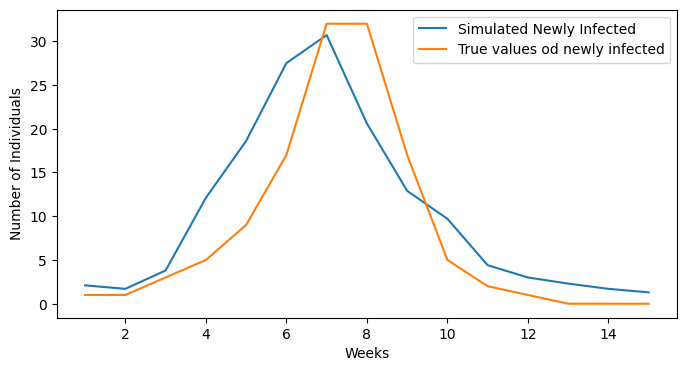

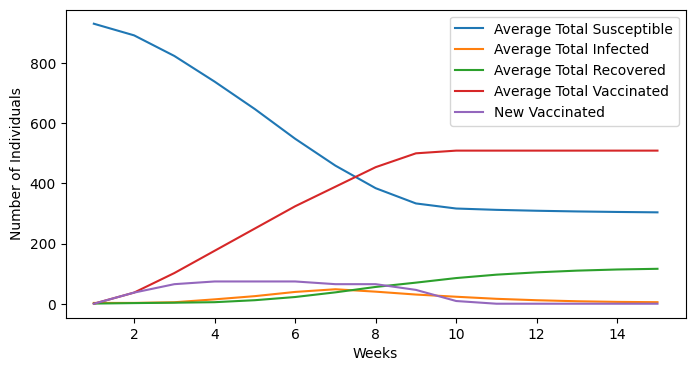

Best RMSE = 5.448791915033398


In [12]:
best = 1000
b_best = p_best = k_best = 0

# It is useless to consider 1, otherwise, 1-min(dk) = 0 doesn't make sense.
# it is unnecessary to go over 10 otherwise graph is too connected and I get an easy spread of the virus
for dk in range(0, k-1):
  for db in np.arange(0, b, 0.1):
    for dp in np.arange(0, p, 0.1):
      beta = np.array([b-db, b+db])
      rho = np.array([p-dp,p+dp])
      average_degree = np.array([k-dk,k+dk])

      for i in average_degree:
        G4 = preferential_attachment_random_graph(n_agents, i)
        for j in beta:
          for z in rho:
            RMSE = function(G4,vaccination,n_agents,I0,i,j,z,N,weeks,0)
            if RMSE < best:
              k_best = i
              b_best = j
              p_best = z
              best = RMSE
              G_best = G4.copy()

print("Best RMSE =",function(G_best,vaccination,n_agents,I0,k_best,b_best,p_best,N,weeks,1))


**Problem 2.** Coloring

In this part, we study graph coloring as an application of distributed learning in potential games. The aim of graph coloring is to assign a color to each node in a given undirected
graph, such that none of the neighbors of a node have the same color as that node.

**2.a)** We study a line graph with 10 nodes. Denote the i-th node state by $X_i(t)$ and the set of possible states by $C = \{red, green\}$. At initialization, each node is red, i.e, $X_i(t) = red$ for all $i=1,...,10.$
Every discrete time instance $t$, one node $I(t)$, chosen uniformly at random, wakes up and updates its color.
The new color (resulting from a node’s update), is chosen from a probability distribution given by:

$$ P(X_i(t+1)=a | X(t),I(t)=i) =  \frac{e^{-\eta(t) \sum_j W_{ij}c(a,X_j(t))}} {\sum_{s\in C} e^{-\eta(t)\sum_j W_{ij}c(s,X_j(t))}}$$

where the cost is given by:

$$ c(s,X_j(t)) =
\begin{cases}
1 \quad {if} \ X_j(t) = s\\
0 \quad {otherwise} \\
\end{cases}
$$

In the above expression, $\eta(t)$ is the inverse of the noise. To decide upon a good choice of $\eta(t)$, some heuristics are required, but it is preferable to have it increasing in time
so that the noise is decreasing. For this exercise we can start with:
$$\eta(t) = \frac{t}{100}$$

To study how close to a solution the learning algorithm is, we consider the potential function, which is given by:

$$U(t) = \frac{1}{2} \sum_{i,j \in \mathcal{V}} W_{ij} c(X_i(t), X_j(t)) $$

where $V$ is the set of nodes. If the potential is zero, there are no conflicting nodes and a solution is found.

**The task is to simulate the learning dynamics described above. Include plots of the potential function in your report and briefly comment on it.**

In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand
import random
import scipy.io

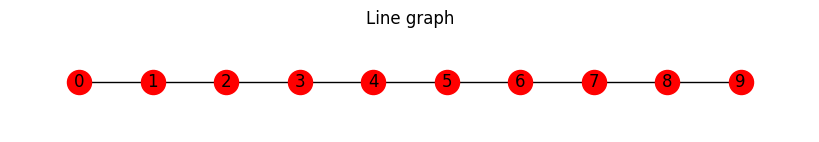

In [14]:
# Create an empty graph
G1 = nx.Graph()

n_nodes = 10

# Add nodes from 0 to 9 to the graph
nodes = range(n_nodes)
G1.add_nodes_from(nodes)

# Create edges so that each node is connected to the next one
for i in range(n_nodes-1):
    G1.add_edge(i, i+1)

# Position nodes on a straight line
pos = {i: (i, 0) for i in range(n_nodes)}

plt.figure(figsize=(8, 1))
nx.draw(G1, pos, with_labels=True, node_color='red')

plt.title("Line graph")
plt.show()


The code iteratively selects a random node, calculates the probability of changing its color and updates the color. To do that, we define a function `sum_neighbors_same_color` that iterates over the neighbors of the specified node (`node_index`) and increments the counter (`sum`) whenever a neighbor has the same color as specified in `chosen_color_neighbors`. After that, we calculate the potential function (`U`) based on the number of edges between nodes of the same color (either red or green). It iterates over all nodes in the graph $G$ and their neighbors, incrementing the sum whenever both the current node and its neighbor are in the same color set (either `red_neighbors` or `green_neighbors`). When the potential function is equal to zero, a solution is found.

In [15]:
def sum_neighbors_same_color(chosen_color_neighbors, node_index, G):

    sum = 0

    # Iterate over each neighbor
    for neighbor in G.neighbors(node_index):
       # Increment the counter if the neighbor has the same color
        if neighbor in chosen_color_neighbors:
            sum += 1
    return sum


def potential_function(red_neighbors, green_neighbors, G):

    sum=0

    # Iterate over nodes in the graph
    for i in G.nodes():
        for n in G.neighbors(i):
            if (i in red_neighbors) and (n in red_neighbors):
                sum += 1
            if (i in green_neighbors) and (n in green_neighbors):
                sum += 1

    U = 1/2 * sum  # Compute the potential function
    return U


Solution found at time: 55



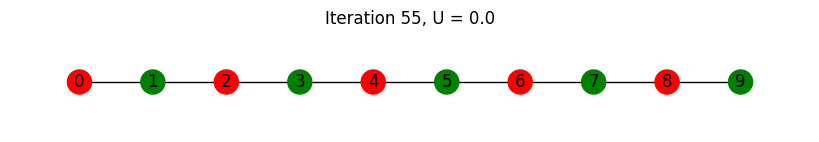

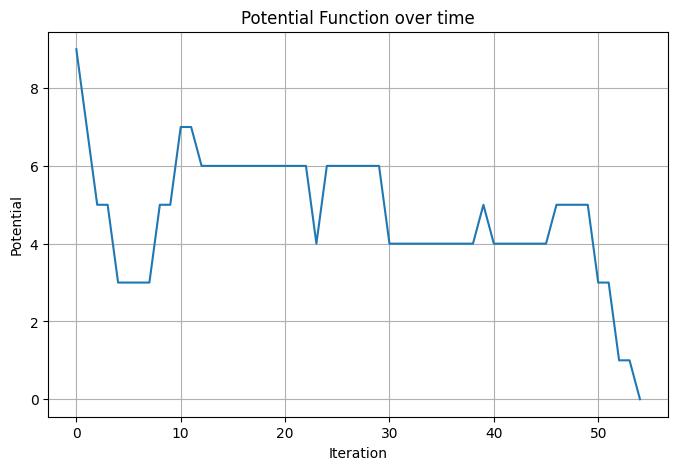

In [16]:
colors = ['red', 'green']
red_nodes = list(range(0, n_nodes))  # Initially all red
green_nodes = []
t = 0
potential = list()

while True:
    G = G1.copy()
    node_I = np.random.choice(G.nodes())  # Choose a random node
    eta = t / 100

    # Calculate the number of neighbors with a given color for a given node
    sum_green = sum_neighbors_same_color(green_nodes, node_I, G)
    sum_red = sum_neighbors_same_color(red_nodes, node_I, G)

    num = np.exp(-eta * sum_green)
    den = num + np.exp(-eta * sum_red)
    P = num / den

    # Choose a random color
    color = np.random.choice(colors, p=[1 - P, P])

    if color == 'green':  # Node becomes or remains green
        if node_I not in green_nodes:
            green_nodes.append(node_I)
            red_nodes.remove(node_I)
    else:  # Node becomes or remains red
        if node_I not in red_nodes:
            red_nodes.append(node_I)
            green_nodes.remove(node_I)

    U = potential_function(red_nodes, green_nodes, G)

    potential.append(U)
    t += 1

    # When U == 0, a solution is found
    if U == 0:
        break

print(f'Solution found at time: {t}\n')

color_map = ['red' if node in red_nodes else 'green' for node in G]
plt.figure(figsize=(8, 1))
nx.draw(G, pos, with_labels=True, node_color=color_map)
plt.title(f'Iteration {t}, U = {U}')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(t), potential)
plt.title('Potential Function over time')
plt.xlabel('Iteration')
plt.ylabel('Potential')
plt.grid(True)
plt.show()

**2.b)** Now we use the coloring algorithm for the problem of assigning wifi-channels to 100 routers. A link between two nodes means that the two routers are able to interfere with each other. The set of possible states is $C = \{1:red, 2:green, 3:blue, 4:yellow, 5:magenta, 6:cyan, 7:white, 8:black\}$, where colors represent frequency bands, and the cost function is

$$c(s,X_j(t)) =
\begin{cases}
2 \quad {if} \ X_j(t) = s \\
1 \quad {if} \ |X_j(t)-s| = 1\\
0 \quad {otherwise} \\
\end{cases}
$$

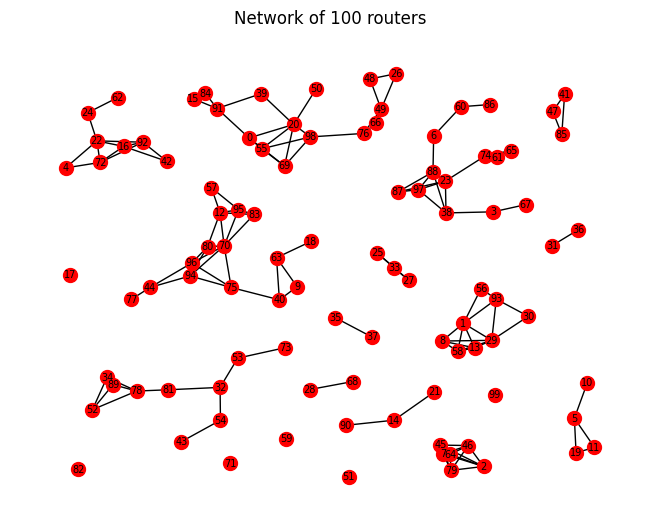

In [17]:
W = scipy.io.loadmat('wifi.mat')["wifi"] #adjacency matrix of the network
coordinates = scipy.io.loadmat('coords.mat')["coords"] #routers' coordinates

colors = ['red','green','blue','yellow','magenta','cyan','white','black']
# map to have frequency bands linked to color name
map = {'red': 1, 'green': 2, 'blue': 3, 'yellow': 4, 'magenta': 5, 'cyan': 6, 'white': 7, 'black': 8}
n_nodes = 100

G = nx.from_numpy_array(W)
for n in G.nodes():
  G.nodes[n]['color']='red'

nx.draw(G, coordinates, with_labels=True, node_color='red', node_size = 100, font_size=7)
plt.title("Network of 100 routers")
plt.show()

We use a similar approach as the previous point, but with more colors. We have a function called ```cost_function``` that, given the node_index and a color, returns the i-th cost.
In this case, a solution is found when the potential function is close to zero, so we set a maximum time limit `t_max = 700`, to verify that a near-zero potential solution is found after a sufficient number of iterations.
We repeat the entire process for different time simulations (`simulations = 5`) to observe how the smallest potential can vary.

In [18]:
def cost_function(ith_color, node_index, G):
    #after choosing a color, this is the cost function to change the color
    col = G.nodes[node_index]['color']
    if col == ith_color:
      return 2
    elif abs(map[col]-map[ith_color]) == 1:
      return 1
    else:
      return 0


def potential_function_2b(G):

    sum=0

    # Iterate over nodes in the graph
    for i in G.nodes():
        for n in G.neighbors(i):
            sum += cost_function(G.nodes[i]['color'], n, G)

    U = (1/2) * sum  # Compute the potential function
    return U


To understand the evolution of the entire network, it is essential to know how P was constructed, that is, of the probability distribution by which the choice of new color for the specific node is made. P is a vector associated with ``node_I`` and of size equal to the number of colors. Each element represents the probability for the node to change color. It is evident that P strongly depends on the chosen node and on the colors of all its neighbors.

Solution found at time: 700
U: 4.0
Simulation: 1


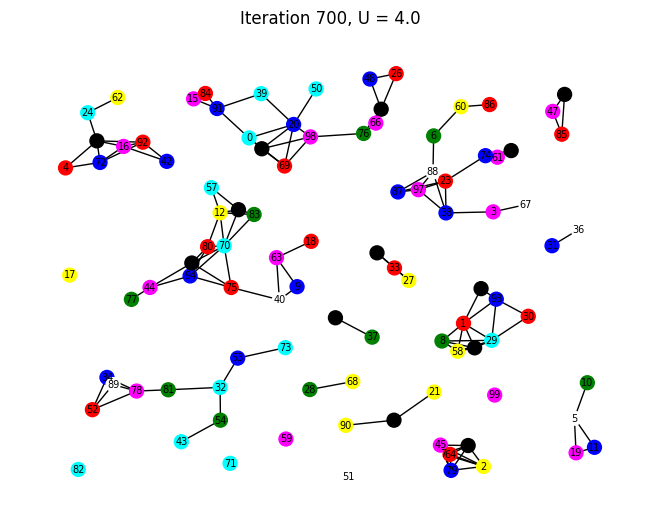



Solution found at time: 700
U: 6.0
Simulation: 2


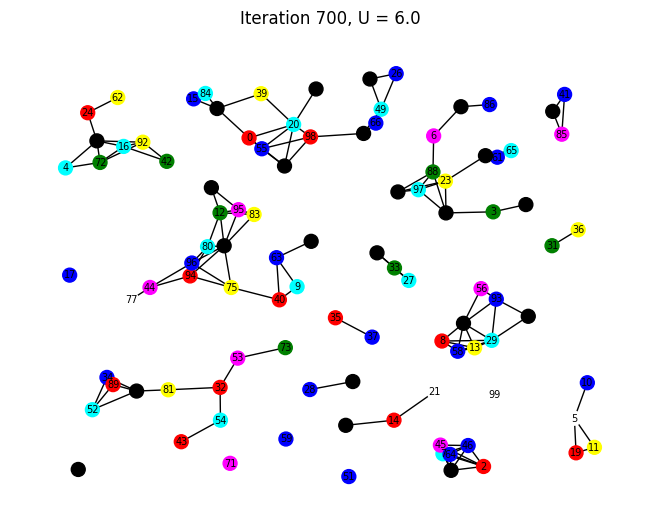



Solution found at time: 700
U: 4.0
Simulation: 3


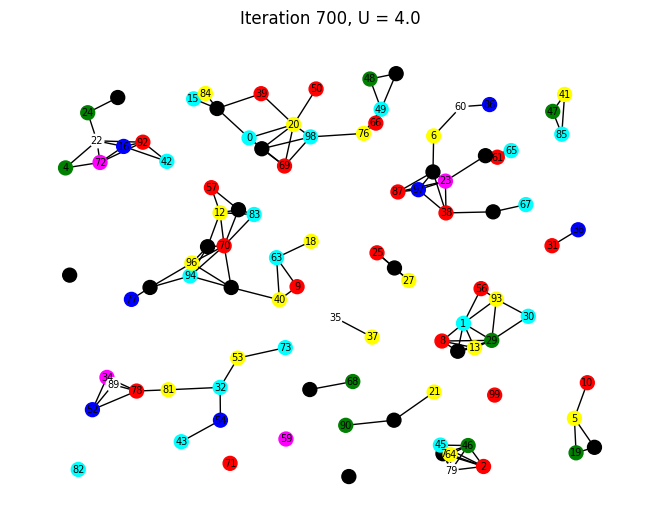



Solution found at time: 700
U: 6.0
Simulation: 4


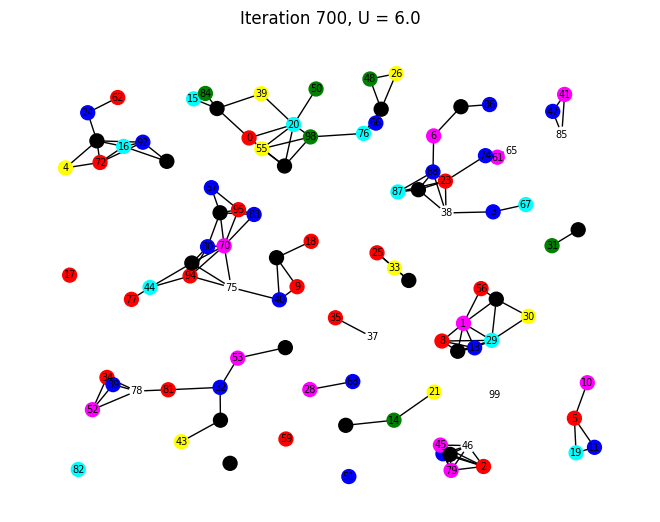



Solution found at time: 700
U: 5.0
Simulation: 5


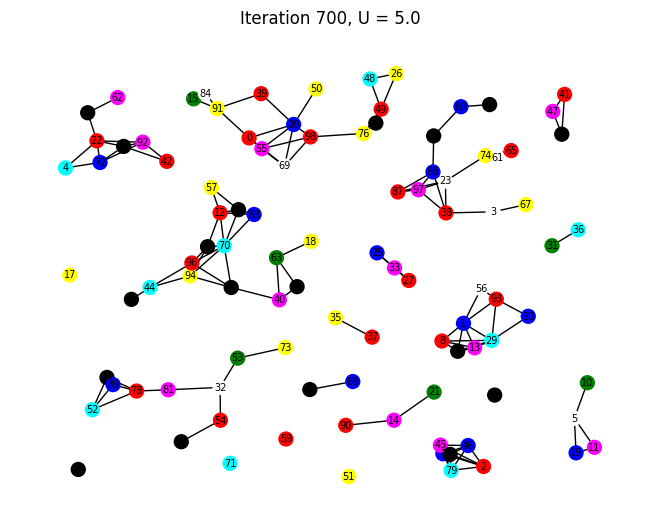

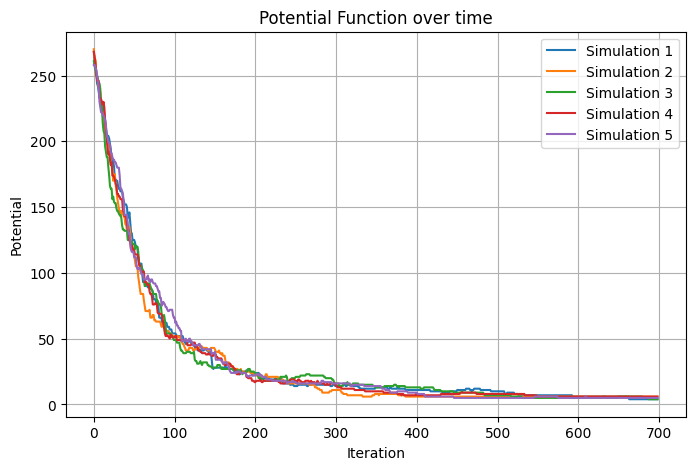

In [19]:
simulations = 5
t_max = 700
pot = np.zeros((simulations, t_max))

for sim in range(simulations):
  potential = np.zeros(t_max)
  t = 0
  U = 0
  P = np.zeros(len(colors))
  best = 10000
  G2 = G.copy()
  while True:
      node_I = np.random.choice(G.nodes())  # Choose a random node
      eta = t / 100
      num=0
      den=0

      # at every iteration, P is updated for the specific node and with current values of parameters
      # each element of P is associated with ith-color
      for i in range(len(colors)):
        cost_node_I = 0
        for j in G.neighbors(node_I):
          cost_node_I += cost_function(colors[i], j, G2)
        num = np.exp(-eta * cost_node_I)
        P[i] = num
        den += num
      for i in range(len(colors)):
        P[i] /= den

      # Choose a random color with a probability distribution given by P
      color = np.random.choice(colors, p=P)

      # Update the color
      G2.nodes[node_I]['color'] = color

      # Compute the potential function
      U = potential_function_2b(G2)

      # Save the minimum
      if U < best:
        best = U

      potential[t-1] = U
      t += 1

      # When U is close to 0, a solution is found
      if best <= 1 or t == t_max:
          pot[sim] = potential
          break

  print(f'Solution found at time: {t}')
  print(f'U: {best}')
  print(f'Simulation: {sim+1}')
  n_colors = [G2.nodes[n]['color'] for n in G2.nodes]
  nx.draw(G, coordinates, with_labels=True, node_color=n_colors, node_size = 100, font_size=7)
  plt.title(f'Iteration {t}, U = {best}')
  plt.show()
  print('\n')

plt.figure(figsize=(8, 5))
for sim in range(simulations):
    plt.plot(pot[sim, :-1], label=f'Simulation {sim + 1}')

plt.title('Potential Function over time')
plt.xlabel('Iteration')
plt.ylabel('Potential')
plt.legend()
plt.grid(True)
plt.show()


After many simulations, we observe that the best potential function found is $4$.

**2.c)** Optional

Evaluate what happens for different choices of $\eta(t)$, i.e., constant (with small and large values), or other increasing functions $\eta(t)$ etc.

Here, we repeat the point $2.b$ with different values of $\eta(t)$: $\frac{t}{100}$, $e^{\frac{t}{1000}}$, $\log(t+10)$, $0.001$, $100$ in order to observe how the potential function changes respect to $\eta(t)$.

We observe that selecting low values, such as $0.001$ or $e^{\frac{t}{1000}}$, results in the potential function not converging to $4$ and the plot exhibits a random trend because the probability of changing one color over another is equal. On the other hand, choosing a larger $\eta(t)$, for example, $log(t+10)$, or a fixed $\eta$ value of $100$, leads to convergence towards $4$.

Simulation: 1
Eta: t / 100
Solution found at time: 700
U: 4.0


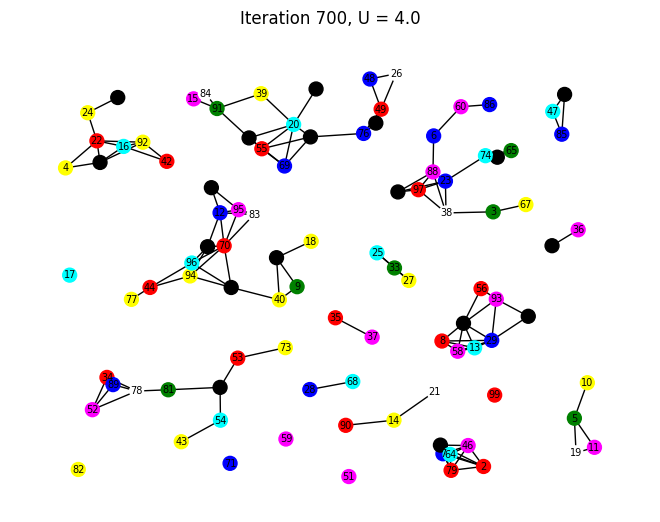



Simulation: 2
Eta: exp(t / 1000)
Solution found at time: 700
U: 10.0


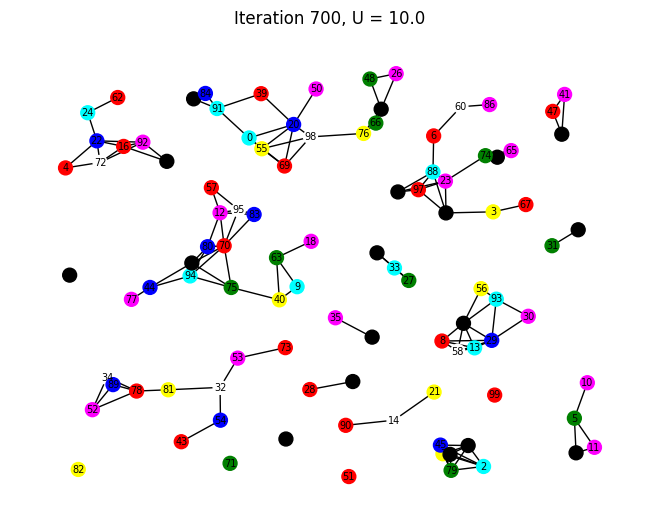



Simulation: 3
Eta: log(t + 10)
Solution found at time: 700
U: 4.0


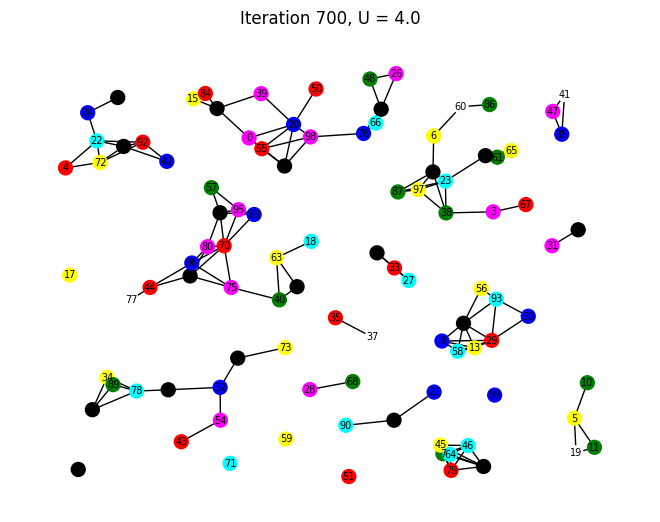



Simulation: 4
Eta: 0.001
Solution found at time: 700
U: 43.0


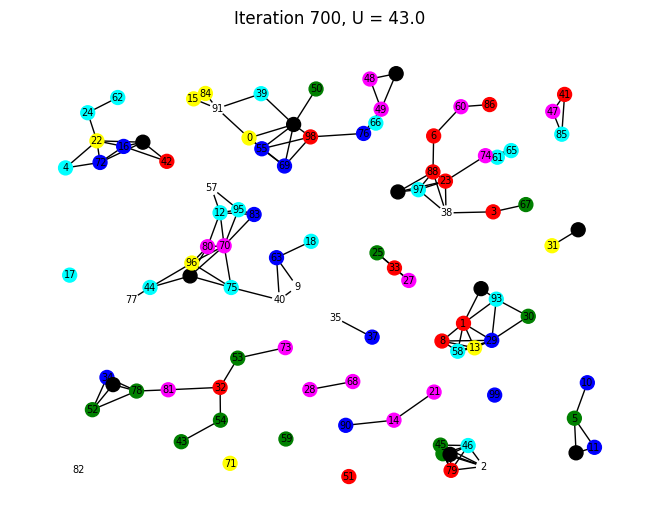



Simulation: 5
Eta: 100
Solution found at time: 700
U: 4.0


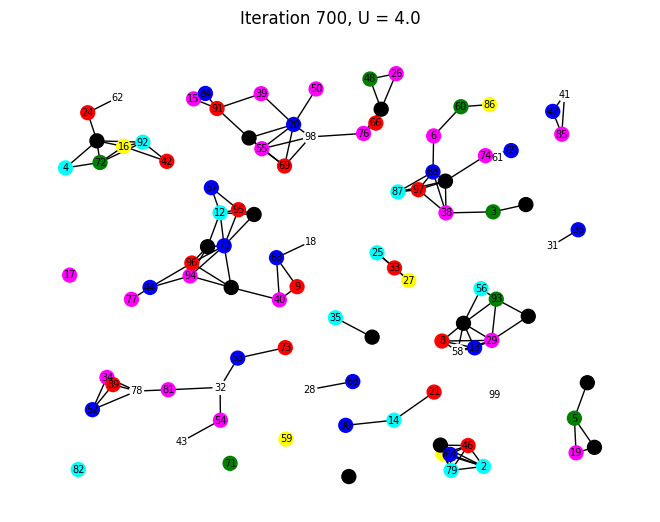

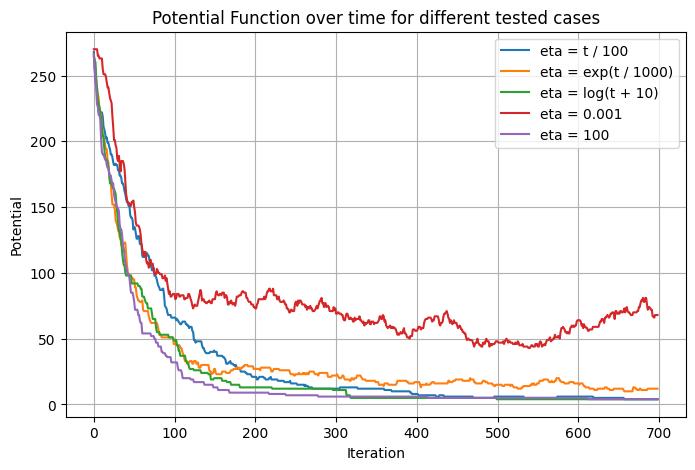

In [20]:
# Set different values of eta
eta_labels = ["t / 100", "exp(t / 1000)", "log(t + 10)", "0.001", "100"]
simulations = len(eta_labels)

t_max = 700
pot = np.zeros((simulations, t_max))

# Iterate for different values of eta
for sim in range(simulations):
  print(f'Simulation: {sim+1}')
  potential = np.zeros(t_max)
  t = 0
  U = 0
  print(f'Eta: {eta_labels[sim]}')
  P = np.zeros(len(colors))
  best = 10000
  G2 = G.copy()

  while True:
      node_I = np.random.choice(G.nodes())  # Choose a random node

      eta_possibles = [t / 100, np.exp(t / 1000), np.log(t + 10), 0.001, 100]
      eta = eta_possibles[sim]

      num=0
      den=0

      # at every iteration, P is updated for the specific node and with current values of parameters
      for i in range(len(colors)):
        cost_node_I = 0
        for j in G.neighbors(node_I):
          cost_node_I += cost_function(colors[i], j, G2)
        num = np.exp(-eta * cost_node_I)
        P[i] = num
        den += num
      for i in range(len(colors)):
        P[i] /= den

      # Choose a random color
      color = np.random.choice(colors, p=P)

      # Change the color
      G2.nodes[node_I]['color'] = color

      # Compute the potential function
      U = potential_function_2b(G2)

      if U < best:
        best = U

      potential[t-1] = U
      t += 1

      # When U is close to 0, a solution is found
      if best <= 1 or t == t_max:
          pot[sim] = potential
          break

  print(f'Solution found at time: {t}')
  print(f'U: {best}')
  n_colors = [G2.nodes[n]['color'] for n in G2.nodes]
  nx.draw(G, coordinates, with_labels=True, node_color=n_colors, node_size = 100, font_size=7)
  plt.title(f'Iteration {t}, U = {best}')
  plt.show()
  print('\n')

plt.figure(figsize=(8, 5))
for eta in range(simulations):
    plt.plot(pot[eta, :-1], label=f'eta = {eta_labels[eta]}')

plt.title('Potential Function over time for different tested cases')
plt.xlabel('Iteration')
plt.ylabel('Potential')
plt.legend()
plt.grid(True)
plt.show()
